## Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/Colab Notebooks/data_glac

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'gdrive/My Drive/Colab Notebooks/data_glac'
/content/gdrive/My Drive/Colab Notebooks/data_glac


In [ ]:
import pandas as pd
import xlrd   ## to convert dates
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cab_data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data_glac/w2/DataSets/Cab_Data.csv')
city = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data_glac/w2/DataSets/City.csv')
cust = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data_glac/w2/DataSets/Customer_ID.csv')
trans = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data_glac/w2/DataSets/Transaction_ID.csv')

In [ ]:
cab_data.head()   ## preview of cab dataset

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [ ]:
city.head()   ## preview of city dataset

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [ ]:
cust.head()   ## preview of customer dataset

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [ ]:
trans.head()    ## preview of transactions dataset

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [ ]:
cab_data[cab_data.duplicated(keep = 'first')].sum()

Transaction ID    0.0
Date of Travel    0.0
Company           0.0
City              0.0
KM Travelled      0.0
Price Charged     0.0
Cost of Trip      0.0
dtype: float64

In [ ]:
'''quick function to check duplicates'''

def check_dup(d):
  dup = d[d.duplicated(keep='first')].sum()
  return dup

## check all datasets for duplicates
check_dup(cab_data),check_dup(city),check_dup(cust),check_dup(trans)

(Transaction ID    0.0
 Date of Travel    0.0
 Company           0.0
 City              0.0
 KM Travelled      0.0
 Price Charged     0.0
 Cost of Trip      0.0
 dtype: float64, City          0.0
 Population    0.0
 Users         0.0
 dtype: float64, Customer ID           0.0
 Gender                0.0
 Age                   0.0
 Income (USD/Month)    0.0
 dtype: float64, Transaction ID    0.0
 Customer ID       0.0
 Payment_Mode      0.0
 dtype: float64)

In [ ]:
'''quick function to check missing in any columns'''

def check_miss(d):
  miss = d.isnull().sum().sum() 
  return miss

## check all datasets for null values
check_miss(cab_data),check_miss(city),check_miss(cust),check_miss(trans)

(0, 0, 0, 0)

In [ ]:
'''merge datasets using transaction_id and customer_id'''

df_1 = cab_data.merge(trans,on = ['Transaction ID'], how = 'left' )
df_1 = df_1.merge(cust,on = ['Customer ID'], how = 'left' )

df_1['Profit'] = df_1['Price Charged'] - df_1['Cost of Trip']     ## add column for profit from each trip

df_1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,57.315
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,23.666
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,27.568
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,25.798
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,16.844


We can now turn our attention to the data provided in the 'city' dataset. It contains population and number of cab users. However, these are string objects separated by commas, so we need to convert them to intergers. We can also add a new column that gives us the proportion of cab users in the population, for each city.

In [ ]:
df_1 = df_1.merge(city,on = ['City'], how = 'left' )    ## merge with city

df_1['Population'] = [c.replace(',','') for c in df_1["Population"]]    ## remove ',' commas from string 
df_1['Users'] = [c.replace(',','') for c in df_1["Users"]]

df_1['Population'] = df_1['Population'].astype(int)                     ## convert string to interger
df_1['Users'] = df_1['Users'].astype(int)

df_1['prop'] = df_1['Users']/df_1['Population']   ## it is easier to use the proportion of total population who use the cab service 
df_1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit,Population,Users,prop
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,57.315,814885,24701,0.030312
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,23.666,814885,24701,0.030312
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,27.568,814885,24701,0.030312
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,25.798,814885,24701,0.030312
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,16.844,814885,24701,0.030312


The dates given are in Excel format. We need to convert this to python DateTime objects so pandas can deal with it easily. 

In [ ]:
no_dates = df_1['Date of Travel']
dates = [xlrd.xldate_as_datetime(c, 0) for c in no_dates]   ## convert excel format dats to datetime python object 

df_1['Date of Travel'] = dates
df_1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit,Population,Users,prop
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,57.315,814885,24701,0.030312
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,23.666,814885,24701,0.030312
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,27.568,814885,24701,0.030312
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,25.798,814885,24701,0.030312
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,16.844,814885,24701,0.030312


We can create two new data frames, one for each company.

In [ ]:
'''separate companies to check'''

c1 = df_1[df_1["Company"] == 'Pink Cab'] 
c2 = df_1[df_1["Company"] != 'Pink Cab']
c2.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit,Population,Users,prop
233,10000384,2016-01-02,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,27602,Card,Male,23,8542,877.0076,814885,24701,0.030312
234,10000385,2016-01-09,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,27594,Cash,Male,28,3901,895.7768,814885,24701,0.030312
235,10000386,2016-01-03,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,27884,Cash,Male,32,13505,232.3320,814885,24701,0.030312
236,10000387,2016-01-06,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,28533,Cash,Male,39,28386,504.1600,814885,24701,0.030312
237,10000388,2016-01-07,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,29039,Card,Male,35,17761,944.1908,814885,24701,0.030312


In [ ]:
uni = df_1['Customer ID'].nunique()
print('Number of unique customers -->',uni)

Number of unique customers --> 46148


In [ ]:
common = [c for c in c1['Customer ID'] if c in c2['Customer ID']]
print('Number of customers who used both companies --> ',len(set(common)))

Number of customers who used both companies -->  25373


## Plots

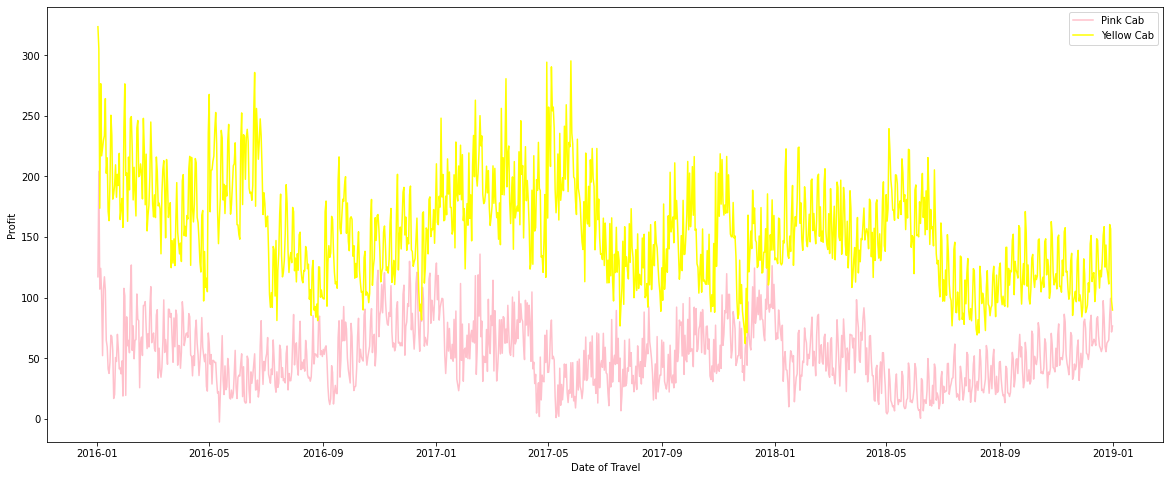

In [ ]:
'''plot profits for entire data'''

plt.figure(figsize=(20,8))
sns.lineplot(x=c1['Date of Travel'], y=c1['Profit'], color='pink', label = 'Pink Cab', ci=None)
sns.lineplot(x=c2['Date of Travel'], y=c2['Profit'], color='yellow', label = 'Yellow Cab', ci=None)
# plt.legends()
plt.show()

It can be seen from the above plot that profits are consistently higher for the Yellow Cab company. This information will be crucial in making the final decision on which company to invest in. 

Now that we have plotted daily sales data, we can look at monthly data to see if there are any trends. 

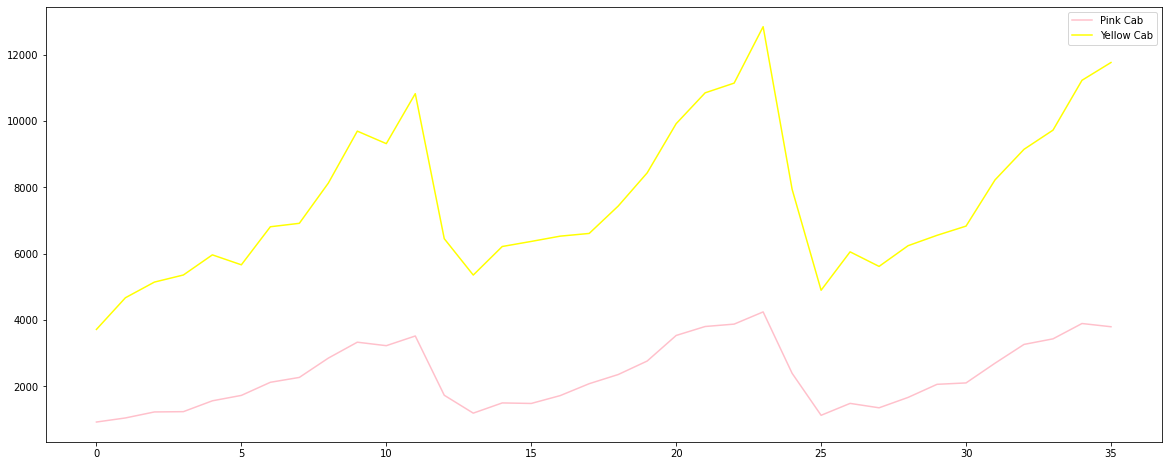

In [ ]:
'''monthly counts'''

## plot number of sales per month for each company

c1_mon = c1['Profit'].groupby([c1['Date of Travel'].dt.year, c1['Date of Travel'].dt.month]).agg({'count'})
c2_mon = c2['Profit'].groupby([c2['Date of Travel'].dt.year, c2['Date of Travel'].dt.month]).agg({'count'})

plt.figure(figsize=(20,8))
sns.lineplot(x = range(len(c1_mon)),y=[c for d in c1_mon.values for c in d],data = c1_mon, color='pink', label = 'Pink Cab')
sns.lineplot(x = range(len(c2_mon)),y=[c for d in c2_mon.values for c in d],data = c2_mon, color='yellow', label = 'Yellow Cab')
plt.show()


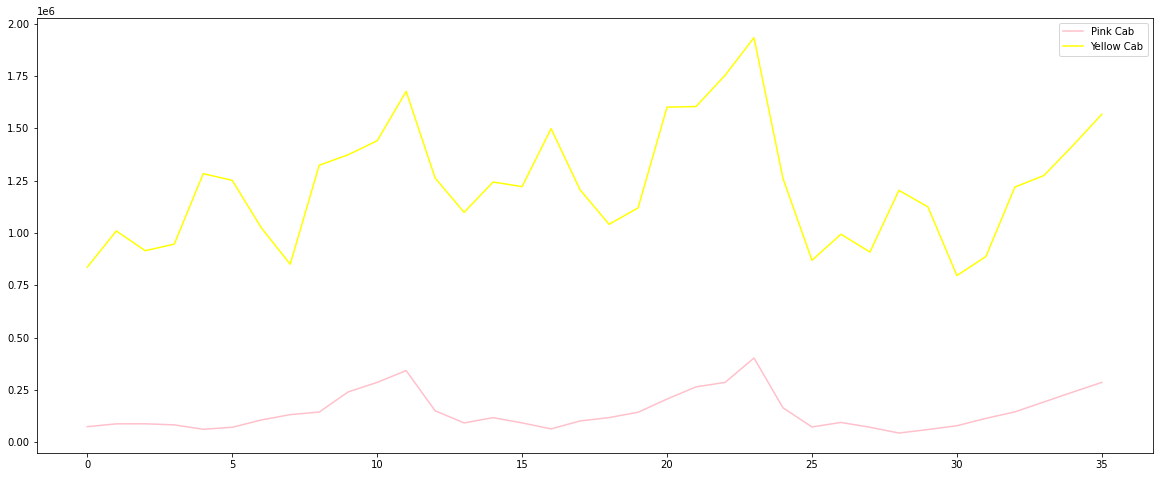

In [ ]:
'''monthly profits'''

## plot profit per month for each company

c1_pro = c1['Profit'].groupby([c1['Date of Travel'].dt.year, c1['Date of Travel'].dt.month]).agg('sum')
c2_pro = c2['Profit'].groupby([c2['Date of Travel'].dt.year, c2['Date of Travel'].dt.month]).agg('sum')

plt.figure(figsize=(20,8))

sns.lineplot(x = range(len(c1_pro)),y=[c for c in c1_pro.values],data = c1_pro, color='pink', label = 'Pink Cab')
sns.lineplot(x = range(len(c2_pro)),y=[c for c in c2_pro.values],data = c2_pro, color='yellow', label = 'Yellow Cab')

plt.show()

It can be seen from the 2 plots above that, not only does the Yellow Cab company have more customers, but their profits are also consistently higher over the 36 month period.

Plotting sales counts and profit by month gives a clearer view of the situation, compared to plotting daily sales.

At a glance it seems they might both be affected by seasonality. This is not unexpected as both are cab companies operating in the same market. It can be seen that the sales peak around the end of each year. This might be explained by the increase in travel during the holiday season. 

It is not so easy to spot this trend when looking at the plots of daily sales. 


## Seasonality/ Trends

We have hypothesised that the number of sales and profits for each company peak around the end of each year. We can confirm this by checking for seasonality by using the *statsmodels* package. Seasonal decompose gives us the seasonality and the trend as well. 

First, we create new dataframes using the monthly sales counts and profits data. We also create a date range for the purpose of plotting.

In [ ]:
'''new dataframes from monthly data'''

start_1, end_1 = min(c1['Date of Travel']), max(c1['Date of Travel'])
dates = pd.date_range(start_1, end_1, freq="M")
d1 = pd.DataFrame([dates, c1_mon.values, c1_pro.values]).transpose()
d1 = d1.set_index(d1[0]).asfreq('m')
d1.columns = ['Date', 'Count', 'Profit']

start_2, end_2 = min(c2['Date of Travel']), max(c2['Date of Travel'])
dates = pd.date_range(start_2, end_2, freq="M")
d2 = pd.DataFrame([dates, c2_mon.values, c2_pro.values]).transpose()
d2 = d2.set_index(d2[0]).asfreq('m')
d2.columns = ['Date', 'Count', 'Profit']

d2.head()

,Date,Count,Profit
0,,,
2016-01-31,2016-01-31,[3719],836308.1108
2016-02-29,2016-02-29,[4674],1009169.1724
2016-03-31,2016-03-31,[5146],914764.7844
2016-04-30,2016-04-30,[5360],946136.4216
2016-05-31,2016-05-31,[5967],1282773.4132


In [ ]:
'''use statsmodel package to decompose series'''

from statsmodels.tsa.seasonal import seasonal_decompose

decomp_1_count = seasonal_decompose(d1[['Count']], model="additive")    ## decompose the monthly sales counts
decomp_2_count = seasonal_decompose(d2[['Count']], model="additive")

decomp_1_pro = seasonal_decompose(d1[['Profit']], model="additive")     ## decompose monthly profits
decomp_2_pro = seasonal_decompose(d2[['Profit']], model="additive")

## write short function so plots can be side by side 

def plotseasonal(res, axes ):
    res.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')

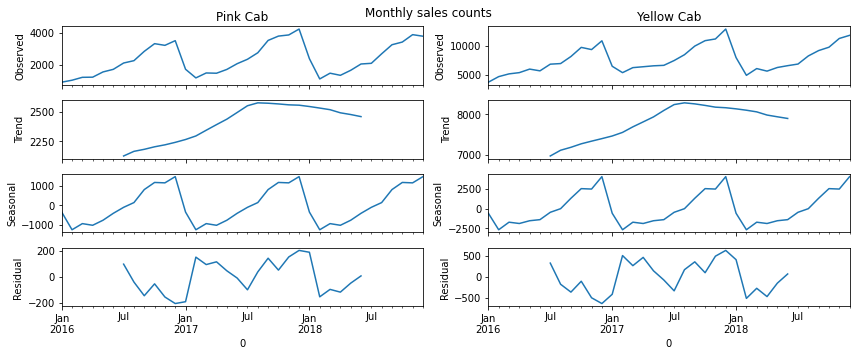

In [ ]:
'''plot decomposition of monthly sales counts'''

fig, axes = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(12,5))

plotseasonal(decomp_1_count, axes[:,0])
axes[0,0].set_title('Pink Cab')
plotseasonal(decomp_2_count, axes[:,1])
axes[0,1].set_title('Yellow Cab')

plt.tight_layout()
plt.suptitle('Monthly sales counts')
plt.show()

The monthly sales count shows very clear seasonality. We can see that, for both companies, the peak occurs in the 12th month, December, of each year. This coincides with the holiday season in America. 

There is also a trend that is present in the decomposition of both companies. The sales count keeps rising till around August 2017, after which it declines for both companies. The cause of this trend calls for further investigation. 

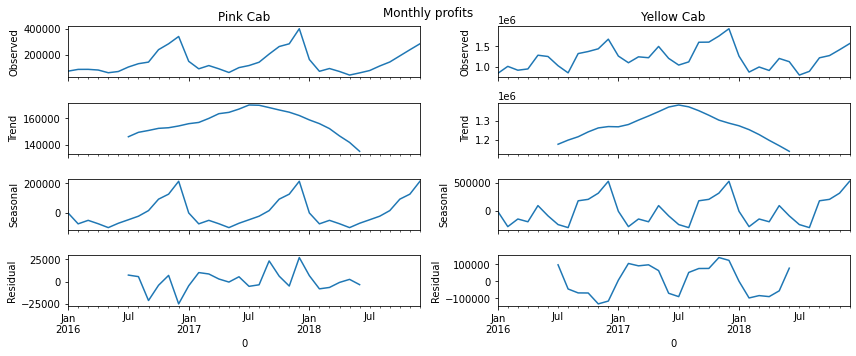

In [ ]:
'''plot decomposition of monthly profits'''

fig, axes = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(12,5))

plotseasonal(decomp_1_pro, axes[:,0])
axes[0,0].set_title('Pink Cab')
plotseasonal(decomp_2_pro, axes[:,1])
axes[0,1].set_title('Yellow Cab')

plt.tight_layout()
plt.suptitle('Monthly profits')
plt.show()

Here we see the same seasonal decompostion for monthly profits. We see the same trend for both companies; the profits start to decline around August 2017. 

It is interesting to see the difference in seasonality between the two companies. Although the seasonality was about the same when we looked at the plots for monthly counts, when we plot the decomposition of monthly profits, we see that there is a difference between the two companies. 

The Yellow cab company profits peak in December of each year, same as the monthly counts. But, we also see a smaller peak in May of each year. This might coincide with the spring holiday period. 

However, it is surprising that we don't see the same seasonality in the profits for the Pink Cab company. There is a small peak in March of each year, but it is almost insignificant. 

It is even more surprising that where we see peaks for the Yellow Cab company, in May, we also see a minimum for the Pink Cab company. Does this mean that customers prefer the Yellow company during the summer ? This calls for further investigation as well. 

# Customer Profile

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


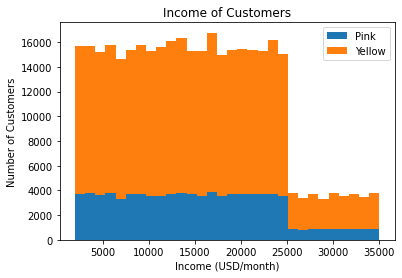

In [ ]:
n_bins=30
x = [c1['Income (USD/Month)'],c2['Income (USD/Month)']]
comp = ['Pink', 'Yellow']
plt.hist(x, n_bins, histtype='bar', stacked=True, label=comp)
plt.legend(loc="upper right")
plt.xlabel("Income (USD/month)")
plt.ylabel("Number of Customers")
plt.title('Income of Customers')
plt.show()

The histogram above compares the incomes of customers for the two companies. For lower income brackets (0 < income < 25000), the Yellow Cab company has many times more customers than the Pink Cab company (about 4 times as many). We can see that this factor drops for higher income brackets (income > 25000). 

We know from counting the number of unique customers that there are many repeat customers. We can eliminate these entries from the data so it is easier to analyse the customer base.

In [ ]:
## group by customer id, only consider if income is unique, i.e; do not count same customer with same income more than once 

c1_inc = c1.groupby('Customer ID')['Income (USD/Month)'].unique()
c2_inc = c2.groupby('Customer ID')['Income (USD/Month)'].unique()

# c1_inc = c1_inc.reset_index()
len(c1_inc), len(c2_inc)

(32330, 39896)

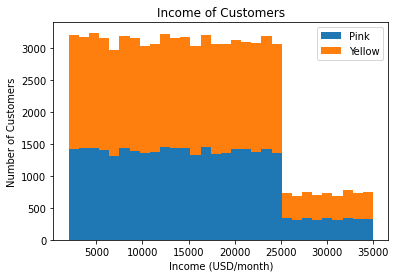

In [ ]:
n_bins=30
x = [[c for c in c1_inc],[c for c in c2_inc]]
comp = ['Pink', 'Yellow']
plt.hist(x, n_bins, histtype='bar', stacked=True, label=comp)
plt.legend(loc="upper right")
plt.xlabel("Income (USD/month)")
plt.ylabel("Number of Customers")
plt.title('Income of Customers')
plt.show()

Now that the repeat customers have been removed, we can have a clearer picture of the customer profiles of both companies. Now, the difference in number of customers is not as high (compared to the previous histogram). The factor seems to have dropped from 4 to 2 (approx). We can also see that the factor is approximately equal for lower (<25000) and higher (>25000) income brackets. 

It can be said that the Yellow Cab company has approximately twice as many customers as the Pink Cab company, and this is the case for every income bracket. 

EDA Hypotheses:

1. Yellow Cab has more customers
2. Yellow Cab has more sales
3. Yellow Cab has higher profits
4. Yellow Cab has more repeat customers
5. Yellow Cab customers have higher income
6. There is seasonality in the data